In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG
from classes.basic_optical_gating import AdaptedV as BOGV
from classes.drawer import Drawer
from classes.plotter import BasicOpticalGatingPlotter as BOGP

In [2]:
import copy
import numpy as np
import matplotlib.pyplot as plt

# Real data
## Run optical gating

In [72]:
sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

plt.figure(figsize = (16,10))
og = BOG()
og.logger.set_normal()
og.settings["matching_method"] = "SSD"
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run()




BOG i Loading sequence...
BOG ✓ Sequence loaded with 1107 frames
BOG i Loading reference sequence...
BOG ✓ Reference sequence loaded with 40 frames
BOG i Setting reference period to 35.77851226661945
BOG i Calculating SADs...
BOG ✓ SADs calculated
BOG i Calculating phases...
BOG ✓ Phases calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated
BOG i Unwrapping phases...
BOG ✓ Unwrapped phases calculated
BOG ✓ Finished processing sequence.


<Figure size 1152x720 with 0 Axes>

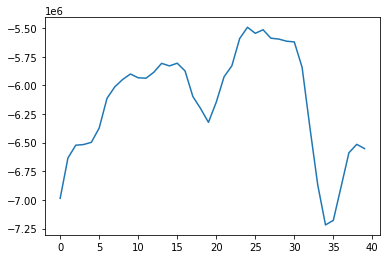

In [94]:
ref_sads = []
for i in range(og.reference_sequence.shape[0]):
    ref_sad = []
    for j in range(og.reference_sequence.shape[0]):
        ref_sad.append(np.sum(np.abs(og.reference_sequence[i].astype(np.int64) - og.reference_sequence[j].astype(np.int64))))
    ref_sads.append(ref_sad)

ref_sads = np.array(ref_sads)

plt.plot(np.mean(ref_sads, axis = 0) - np.mean(og.sads, axis = 0))
plt.show()



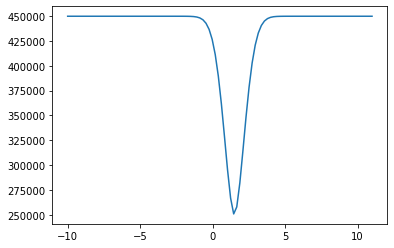

c:\Users\kross\anaconda3\envs\open-optical-gating\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


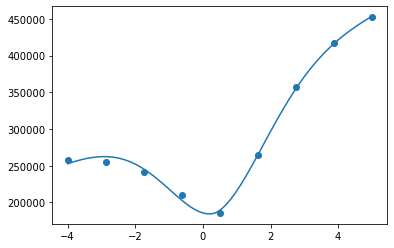

In [4]:
frame = 600

def super_gaussian(x, a, b, c, d, e, f):
    d = 0.9
    return -a * np.exp(-(((x-b)**2)/c)**d) + e + f * x

plt.plot(np.linspace(-10, 11, 100), super_gaussian(np.linspace(-10, 11, 100), 200000, 1.5, 1, 0.9, 450000, 0.001))
plt.show()

minima = np.argmin(og.sads[frame][2:-2]) + 2

plt.scatter(np.linspace(-4, 5, 9), og.sads[frame][minima - 4:minima + 5])

from scipy.optimize import curve_fit

popt, popc = curve_fit(super_gaussian, np.linspace(-4, 5, 9), og.sads[frame][minima-4:minima+5], maxfev = 100000, p0 = [200000, 1.5, 1, 0.9, 450000, 0.001])

plt.plot(np.linspace(-4, 5, 100), super_gaussian(np.linspace(-4, 5, 100), *popt))
plt.show()

BOG i Loading sequence...
BOG ✓ Sequence loaded with 2000 frames
BOG i Loading reference sequence...
BOG ✓ Reference sequence loaded with 311 frames
BOG i Setting reference period to None
BOG i Calculating SADs...
BOG ✓ SADs calculated
BOG i Calculating phases...
BOG ✓ Phases calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated
BOG i Unwrapping phases...
BOG ✓ Unwrapped phases calculated
BOG ✓ Finished processing sequence.
BOG i Calculating phases...
BOG ✓ Phases calculated


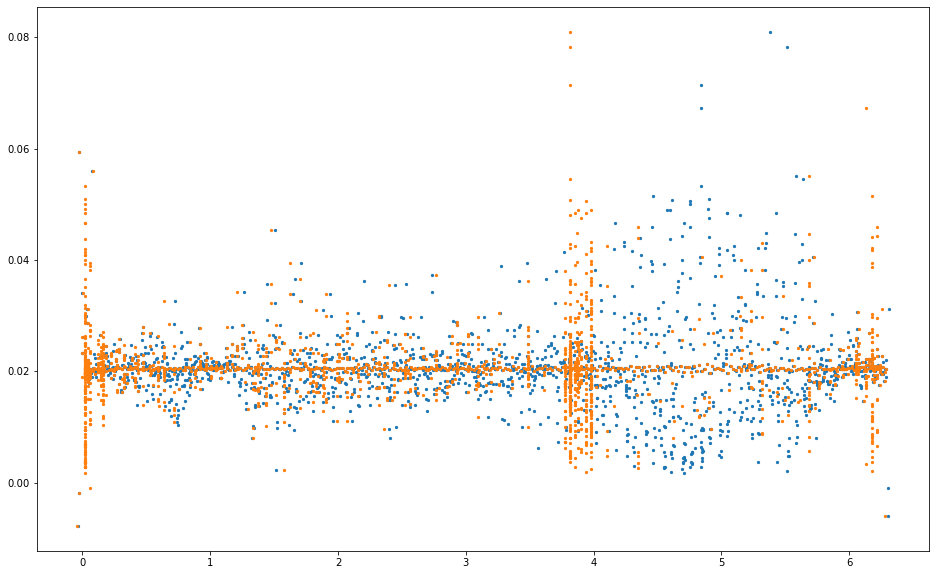

'og_lf = BOG()\nog_lf.set_sequence("D:/Data/both 800fps/brightfield/*tif")\nog_lf.set_reference_sequence("D:/Data/both 800fps/ref_seq.tif")\nog_lf.set_reference_period(3.062623721828068710e+02)\nog_lf.reduce_reference_framerate(8)\nog_lf.run()'

In [35]:
plt.figure(figsize = (16,10))

og = BOG()
og.logger.set_normal()
og.set_sequence("D:/Data/both 800fps/brightfield/*tif")
og.set_reference_sequence("D:/Data/both 800fps/ref_seq.tif")
og.set_reference_period(3.062623721828068710e+02)
og.run()

"""og_lf = BOG()
og_lf.set_sequence("D:/Data/both 800fps/brightfield/*tif")
og_lf.set_reference_sequence("D:/Data/both 800fps/ref_seq.tif")
og_lf.set_reference_period(3.062623721828068710e+02)
og_lf.reduce_reference_framerate(8)
og_lf.run()"""

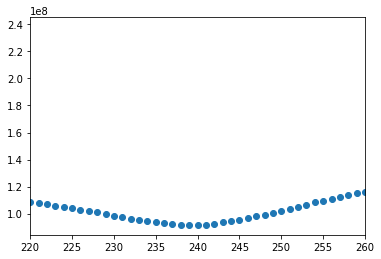

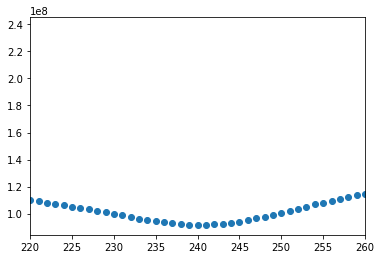

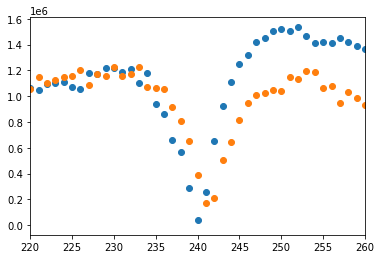

230


In [29]:
plt.scatter(range(og.sads[50].shape[0]), og.sads[50])
plt.xlim(220, 260)
plt.show()

plt.scatter(range(og.sads[50].shape[0]), og.sads[51])
plt.xlim(220, 260)
plt.show()

plt.scatter(range(og.sads[50].shape[0]), np.abs(og.sads[50] - og.sads[51]))
plt.scatter(range(og.sads[50].shape[0]), np.abs(og.sads[51] - og.sads[52]))
plt.xlim(220, 260)
plt.show()

print(np.argmin(og.sads[50] - og.sads[51]))

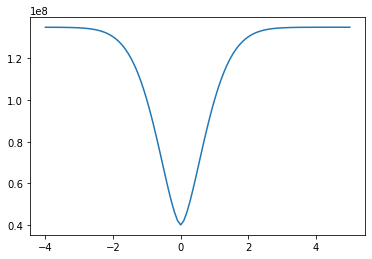

C:\Users\kross\AppData\Local\Temp\ipykernel_17452\2216961843.py:5: RuntimeWarning: invalid value encountered in power
  return -a * np.exp(-(((x-b)**2)/c)**d) + e + f * x


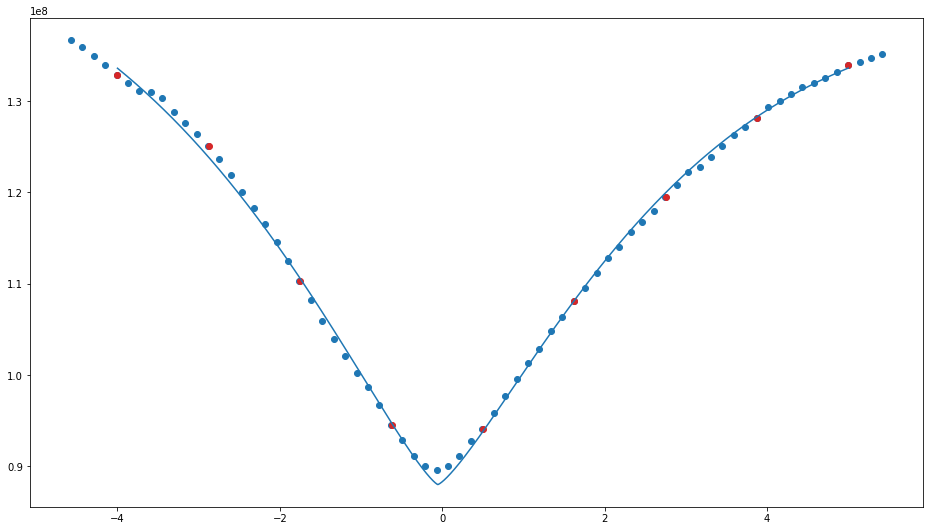

In [13]:
frame = 600

def super_gaussian(x, a, b, c, d, e, f):
    #d = 0.69
    return -a * np.exp(-(((x-b)**2)/c)**d) + e + f * x

plt.plot(np.linspace(-4, 5, 100), super_gaussian(np.linspace(-4, 5, 100), 0.95e8, 0, 1, 0.8, 1.35e8, 1))
plt.show()

minima = np.argmin(og_lf.sads[frame][2:-2]) + 2

plt.figure(figsize = (16,9))
plt.scatter(np.linspace(-4, 5, 9), og_lf.sads[frame][minima - 4:minima + 5], c = "tab:red")

from scipy.optimize import curve_fit

popt, popc = curve_fit(super_gaussian, np.linspace(-4, 5, 9), og_lf.sads[frame][minima-4:minima+5], maxfev = 1000000, p0 = [5.84414558e+07, 0, 1, 0.8, 1.46412103e+08, 190000])
plt.plot(np.linspace(-4, 5, 10000), super_gaussian(np.linspace(-4, 5, 10000), *popt))

minima = np.argmin(og.sads[frame][2:-2]) + 2
plt.scatter(np.linspace(-4.575, 5.42, 9 * 8), og.sads[frame][minima - 4 * 8:minima + 5 * 8], zorder = -10000)
plt.show()

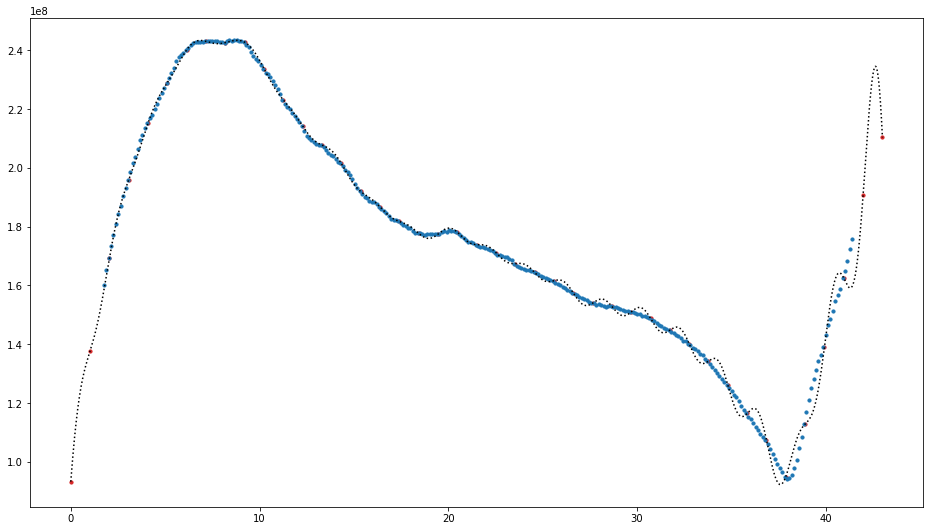

In [ ]:
def sinc_interp(x, s, u):
    """
    Interpolates x, sampled at "s" instants
    Output y is sampled at "u" instants ("u" for "upsampled")
    
    from Matlab:
    http://phaseportrait.blogspot.com/2008/06/sinc-interpolation-in-matlab.html        
    """
    
    if len(x) != len(s):
        raise Exception("x and s must be the same length")
    
    # Find the period    
    T = s[1] - s[0]
    
    sincM = np.tile(u, (len(s), 1)) - np.tile(s[:, np.newaxis], (1, len(u)))
    y = np.dot(x, np.sinc(sincM/T))
    return y

frame = 90
minima = np.argmin(og_lf.sads[frame][2:-2]) + 2

plt.figure(figsize = (16,9))
plt.scatter(np.linspace(0,og_lf.sads[frame].shape[0], og_lf.sads[frame].shape[0]), og_lf.sads[frame], c = "tab:red", s = 10)

u = sinc_interp(og_lf.sads[frame], np.linspace(0,og_lf.sads[frame].shape[0], og_lf.sads[frame].shape[0]), np.linspace(0,og_lf.sads[frame].shape[0], 10000))

plt.plot(np.linspace(0,og_lf.sads[frame].shape[0], 10000), u, c = "black", ls = ":")
plt.scatter(np.linspace(1.75,og_lf.sads[frame].shape[0] - 1.6, og.sads[frame].shape[0]), og.sads[frame], s = 10)

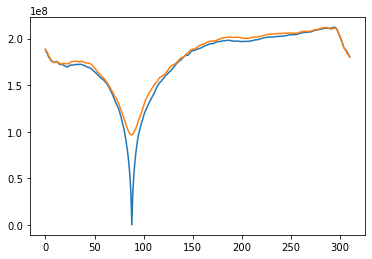

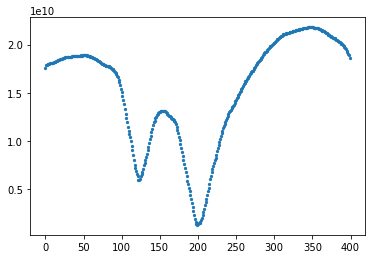

In [ ]:
plt.plot(og.sads[200])
plt.plot(og.sads[506])
plt.show()

points = []
for i in range(400):
    points.append(np.sum(np.abs(og.sads[507] - og.sads[0 + i])))

plt.scatter(range(len(points)), points, s = 5)
plt.show()

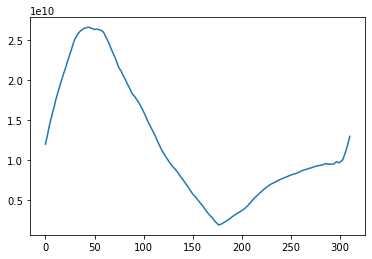

In [ ]:
ref_sads = []

for i in range(og.reference_sequence.shape[0]):
    ref_sad = []
    for j in range(og.reference_sequence.shape[0]):
        ref_sad.append(np.sum(np.abs(og.reference_sequence[i].astype(np.int32) - og.reference_sequence[j].astype(np.int32))))
    ref_sads.append(ref_sad)

ref_sads = np.array(ref_sads)

subsads = []
for i in range(og.sads.shape[0]):
    subsad = []
    for j in range(ref_sads.shape[0]):
        subsad.append(np.sum(np.abs(og.sads[i] - ref_sads[j])))
    subsads.append(subsad)

subsads = np.array(subsads)

plt.plot(subsads[0])

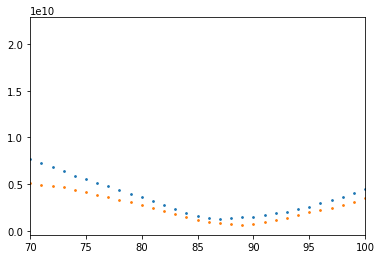

87
89


In [ ]:
plt.scatter(range(subsads[507].shape[0]), subsads[507], s = 3)
#plt.show()
plt.scatter(range(og.sads[507].shape[0]), og.sads[507] * 100 - 0.9e10, s = 3)
plt.xlim(70,100)
plt.show()

print(np.argmin(subsads[507]))
print(np.argmin(og.sads[507]))